In [144]:
!pip install pycaret

In [145]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [146]:
!pip install pycaret[analysis]

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/Chorouq14/INSE-6220/refs/heads/main/BC%20data.csv?token=GHSAT0AAAAAADCR6UIO4WQZTAMC3AD5HV3I2AG6ECQ')
df.head(25)

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,car,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,car,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,car,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,car,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,car,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


In [149]:
df['Class'] = df['Class'].replace({'adi': 0, 'car': 1, 'con' : 2, 'fad' : 3, 'gla' : 4, 'mas' : 5 })
df.head(10)

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,1,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,1,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,1,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,1,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,1,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,1,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,1,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,1,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,1,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


In [150]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


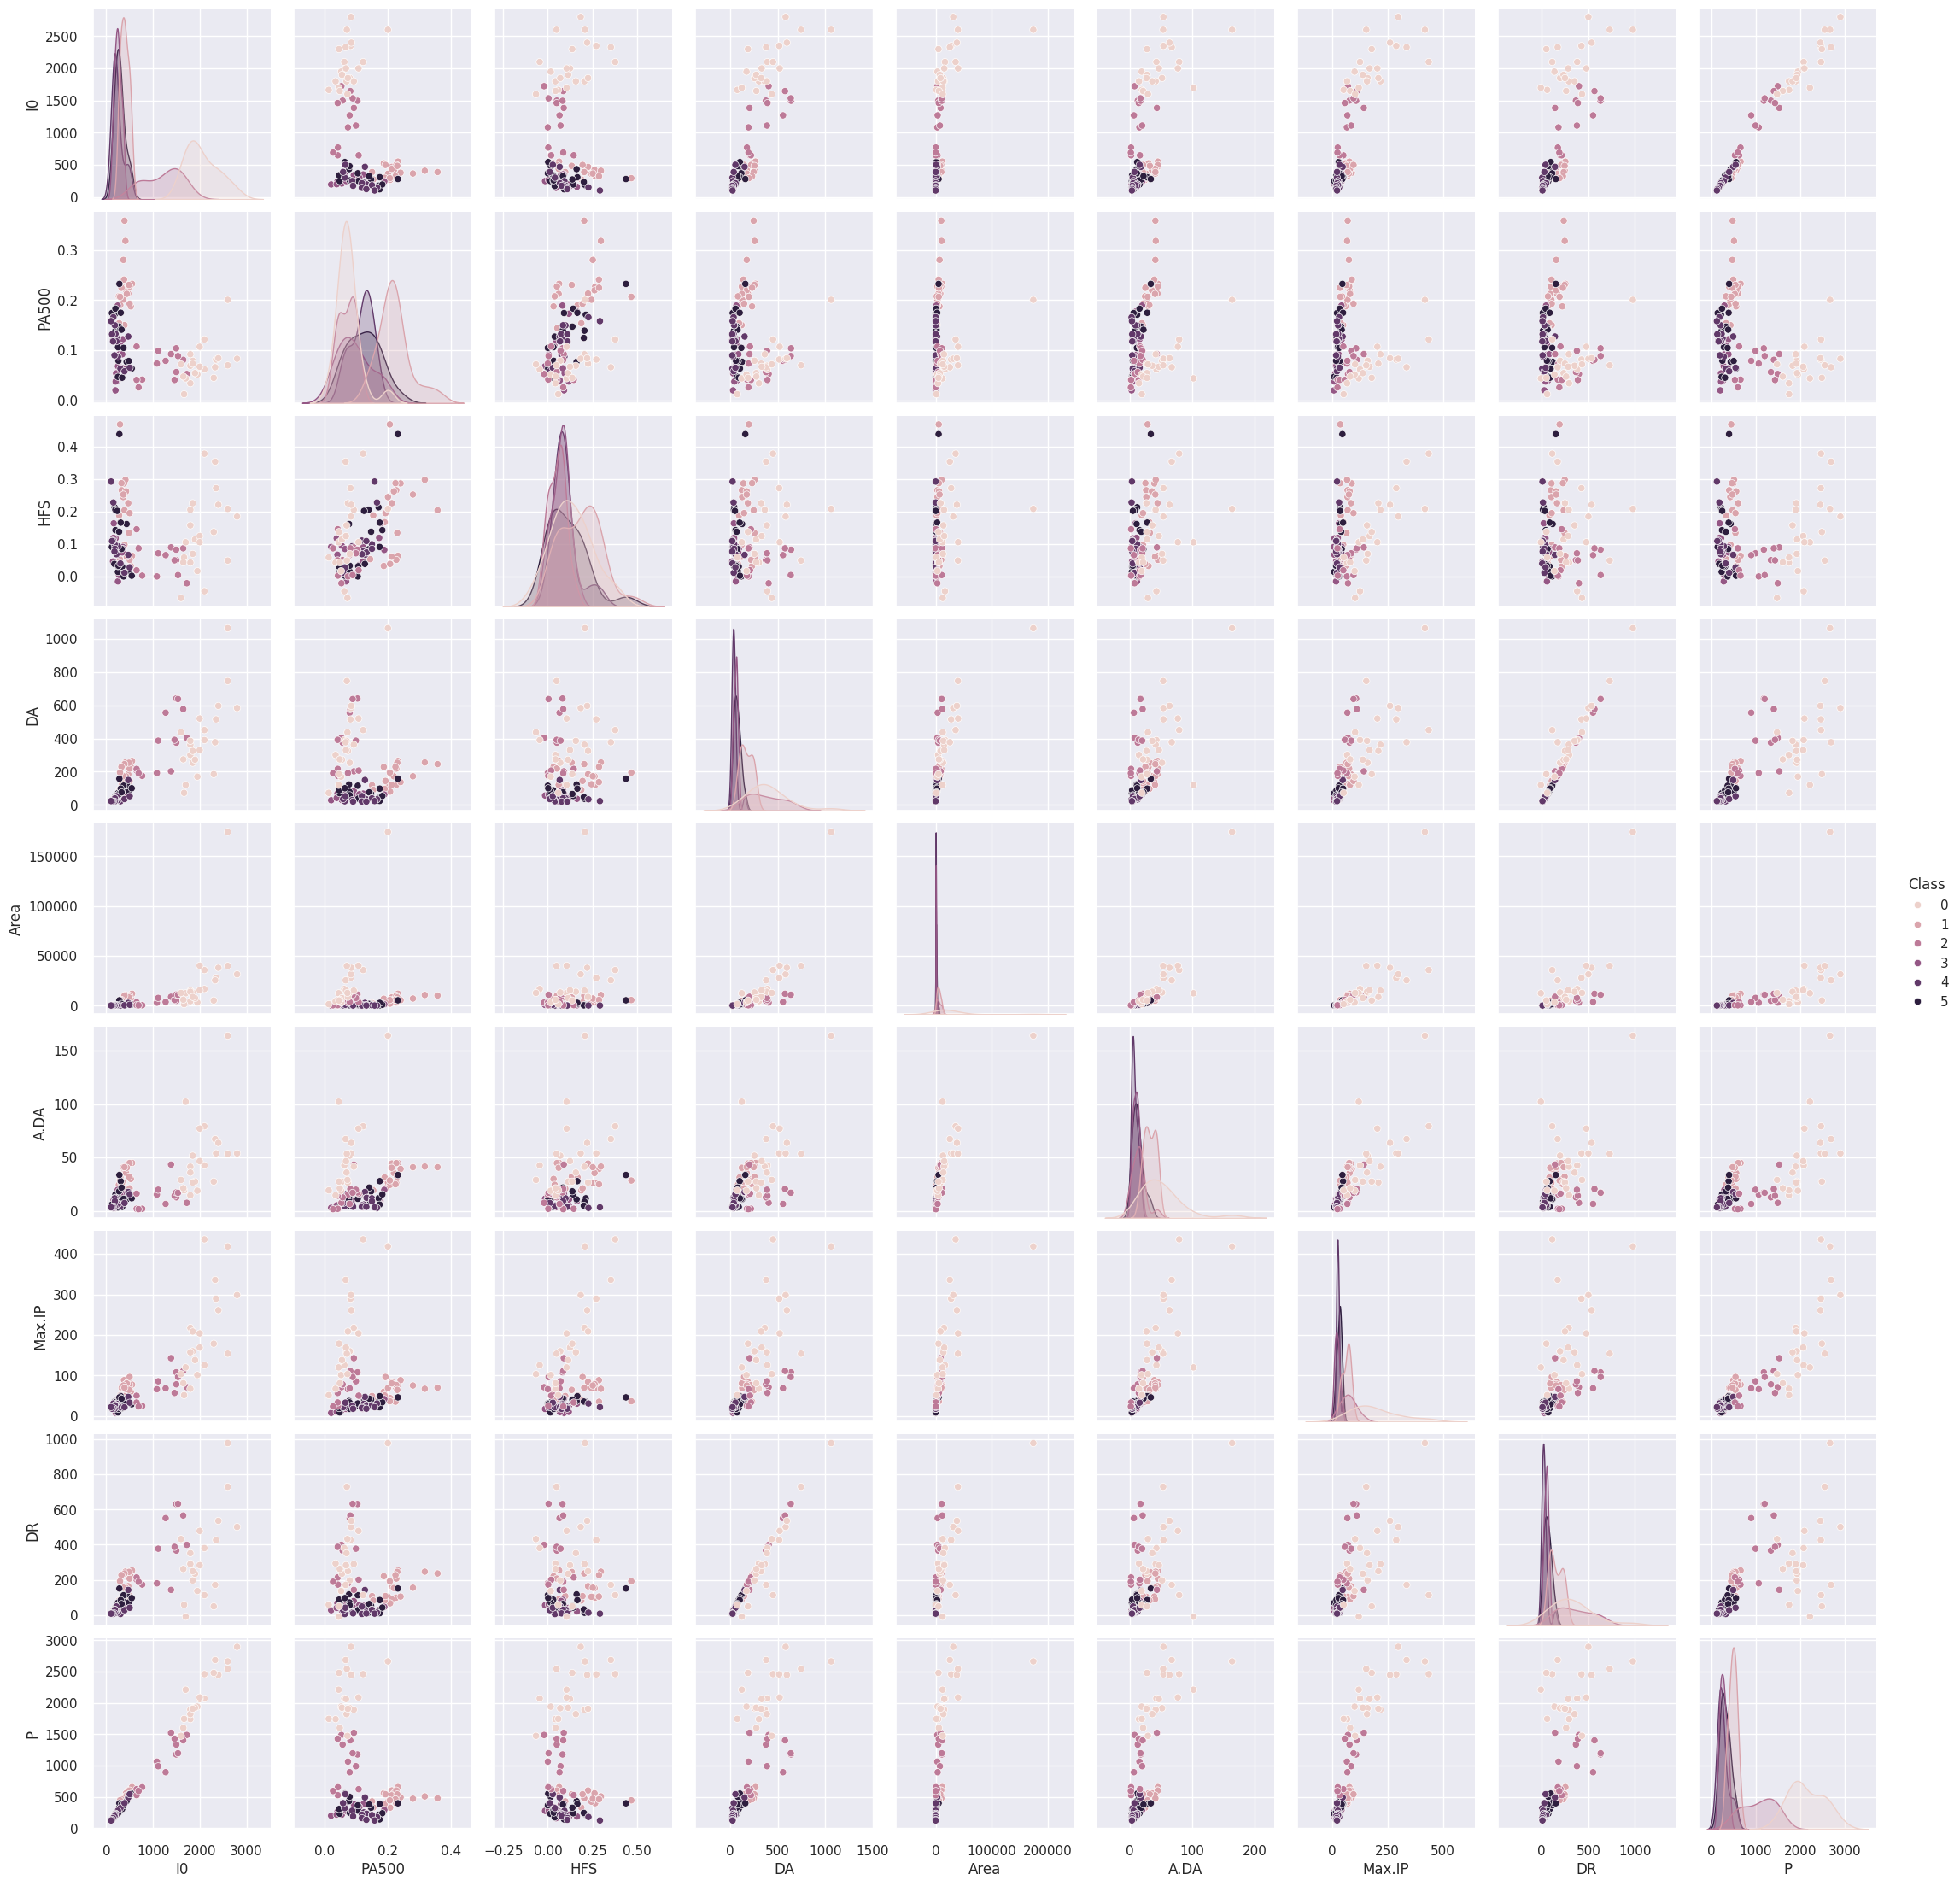

In [151]:
sns.pairplot(df, hue='Class')
plt.show()

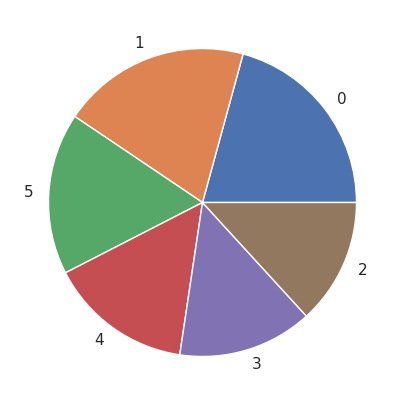

In [152]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [153]:
X = df.drop(columns=['Class'])
X.head(10)

,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


In [154]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I0,106.0,784.251618,753.950075,103.000000,250.000000,384.936489,1487.989626,2800.000000
PA500,106.0,0.120133,0.068596,0.012392,0.067413,0.105418,0.169602,0.358316
HFS,106.0,0.114691,0.101347,-0.066323,0.043982,0.086568,0.166504,0.467748
DA,106.0,190.568642,190.801448,19.647670,53.845470,120.777303,255.334809,1063.441427
Area,106.0,7335.155162,18580.314213,70.426239,409.647141,2219.581163,7615.204968,174480.476218
A.DA,106.0,23.473784,23.354672,1.595742,8.180321,16.133657,30.953294,164.071543
Max.IP,106.0,75.381258,81.345838,7.968783,26.893773,44.216040,83.671755,436.099640
DR,106.0,166.710575,181.309580,-9.257696,41.781258,97.832557,232.990070,977.552367
P,106.0,810.638127,763.019135,124.978561,270.215238,454.108153,1301.559438,2896.582483


In [155]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,-0.345766,0.985996,-0.818664,0.201326,-0.026581,0.276930,-0.187452,0.299396,-0.334219
1,-0.605358,1.563752,1.493038,-0.365533,-0.225601,0.113379,-0.069958,-0.374756,-0.540435
2,-0.309671,1.645558,-0.507207,0.390925,0.246221,0.921566,0.029793,0.482536,-0.202616
3,-0.538725,1.768267,1.700676,-0.278719,-0.104528,0.678651,0.165230,-0.340877,-0.417345
4,-0.561605,1.180285,1.285400,-0.345742,-0.218721,0.123400,-0.074009,-0.348258,-0.508080
5,-0.525568,0.438917,-0.168065,-0.378847,-0.262788,-0.112078,-0.316499,-0.327091,-0.502037
6,-0.658057,0.351998,-0.611026,-0.610500,-0.332331,-0.324193,-0.490086,-0.560643,-0.632557
7,-0.677751,0.495159,0.724778,-0.521543,-0.301686,-0.184382,-0.445597,-0.465784,-0.630817
8,-0.418787,1.361793,1.098526,-0.031483,0.045976,0.897842,0.112415,-0.014342,-0.273004
9,-0.481422,1.456381,1.458432,-0.095827,-0.066354,0.514621,0.045393,-0.075021,-0.332315


In [156]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I0,106.0,-5.865329e-17,1.004751,-0.907869,-0.711970,-0.532147,0.937836,2.686285
PA500,106.0,-2.157603e-16,1.004751,-1.578115,-0.772197,-0.215532,0.724600,3.488752
HFS,106.0,-2.890769e-16,1.004751,-1.794562,-0.701003,-0.278805,0.513679,3.500204
DA,106.0,-1.214961e-16,1.004751,-0.900061,-0.719977,-0.367518,0.341055,4.596503
Area,106.0,-2.932665e-17,1.004751,-0.392848,-0.374504,-0.276630,0.015144,9.038564
A.DA,106.0,3.980045e-17,1.004751,-0.941224,-0.657946,-0.315783,0.321779,6.048712
Max.IP,106.0,-2.545134e-16,1.004751,-0.832651,-0.598898,-0.384940,0.102401,4.455446
DR,106.0,3.435407e-16,1.004751,-0.975151,-0.692312,-0.381696,0.367296,4.493385
P,106.0,-3.351617e-17,1.004751,-0.902883,-0.711634,-0.469482,0.646450,2.746791


In [157]:
observations = list(df.index)
variables = list(df.columns)

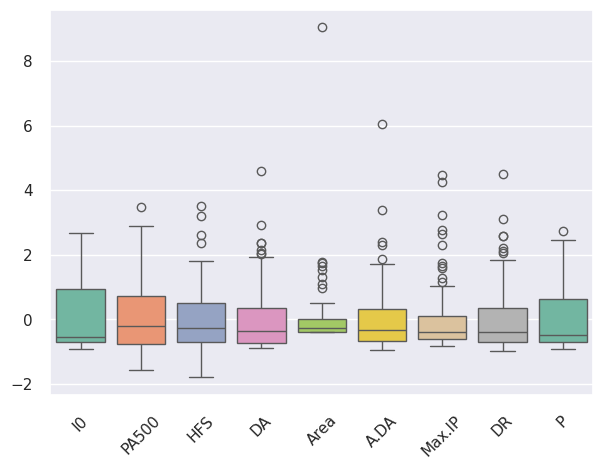

In [158]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

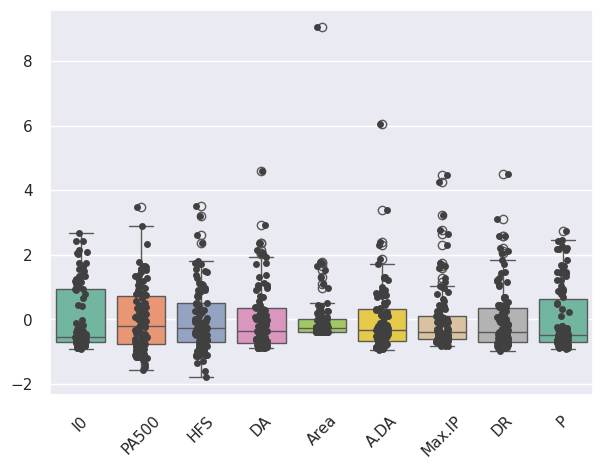

In [159]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color="0.25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

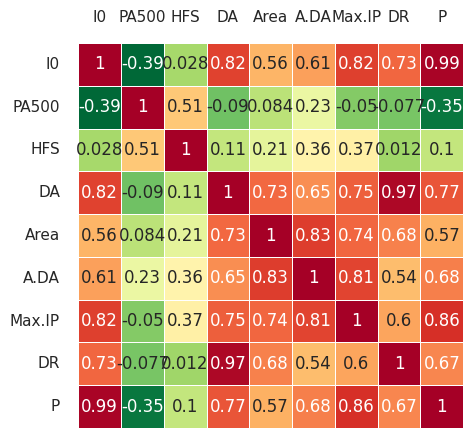

In [160]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '$Z_2$')

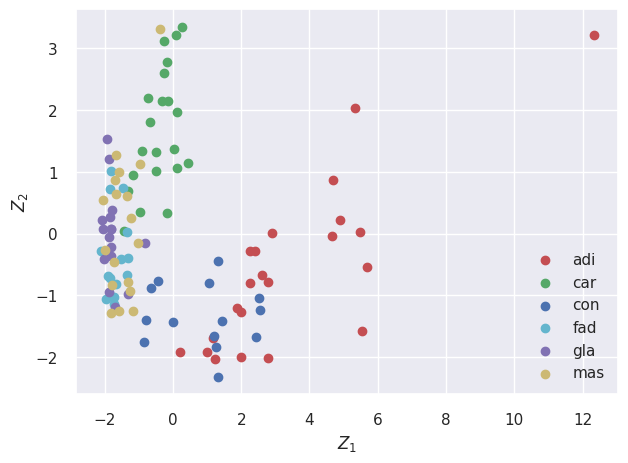

In [161]:
pca = PCA()
Z = pca.fit_transform(X)
idx_adi = np.where(y == 0)
idx_car = np.where(y == 1)
idx_con = np.where(y == 2)
idx_fad = np.where(y == 3)
idx_gla = np.where(y == 4)
idx_mas = np.where(y == 5)


plt. figure()
plt.scatter(Z[idx_adi,0], Z[idx_adi,1], c='r', label='adi')
plt.scatter(Z[idx_car,0], Z[idx_car,1], c='g', label='car')
plt.scatter(Z[idx_con,0], Z[idx_con,1], c='b', label='con')
plt.scatter(Z[idx_fad,0], Z[idx_fad,1], c='c', label='fad')
plt.scatter(Z[idx_gla,0], Z[idx_gla,1], c='m', label='gla')
plt.scatter(Z[idx_mas,0], Z[idx_mas,1], c='y', label='mas')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

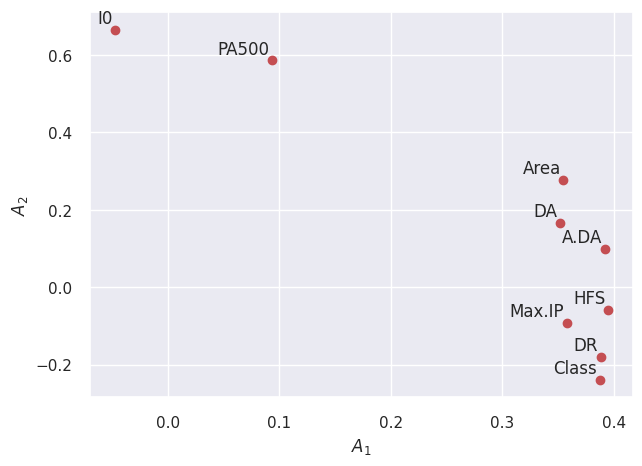

In [162]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

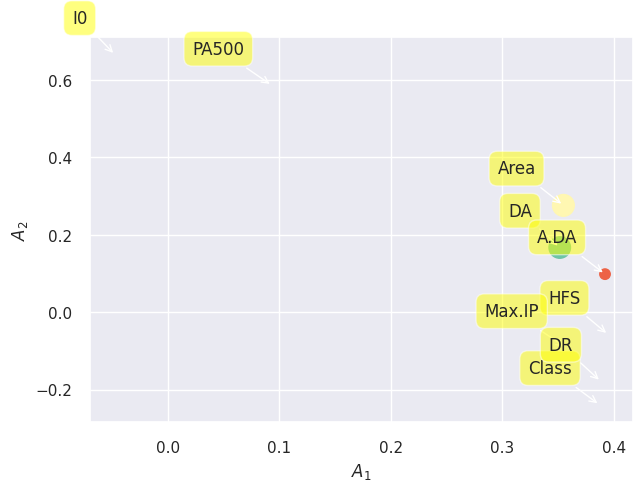

In [163]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

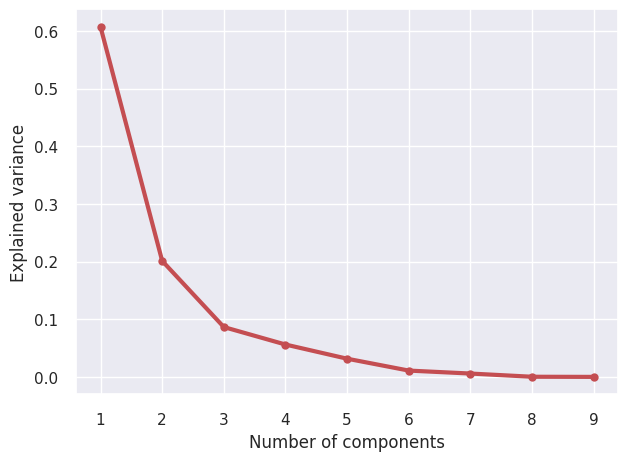

In [164]:

Lambda = pca.explained_variance_

x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

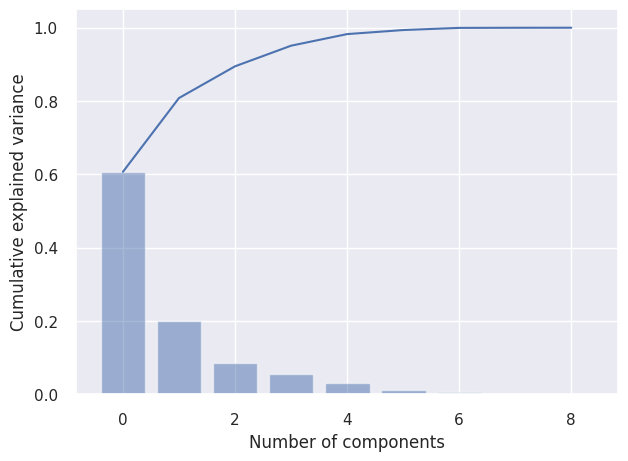

In [165]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [166]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(ell * 100)
}
PC_variance

{'0': 'PC 1 (60.7%)',
 '1': 'PC 2 (20.1%)',
 '2': 'PC 3 (8.7%)',
 '3': 'PC 4 (5.6%)',
 '4': 'PC 5 (3.2%)',
 '5': 'PC 6 (1.1%)',
 '6': 'PC 7 (0.6%)',
 '7': 'PC 8 (0.0%)',
 '8': 'PC 9 (0.0%)'}

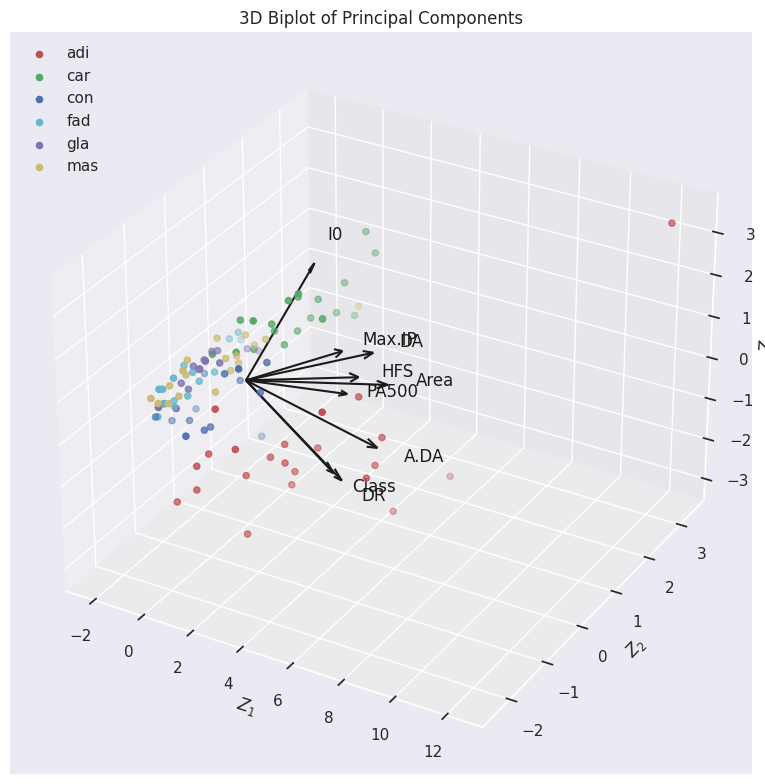

In [167]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


A = A.to_numpy() if hasattr(A, 'to_numpy') else A
Z = Z.to_numpy() if hasattr(Z, 'to_numpy') else Z


A1 = A[:, 0]
A2 = A[:, 1]
A3 = A[:, 2]
Z1 = Z[:, 0]
Z2 = Z[:, 1]
Z3 = Z[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$Z_1$')
ax.set_ylabel('$Z_2$')
ax.set_zlabel('$Z_3$')

for i in range(len(A1)):
    ax.quiver(
        0, 0, 0,
        A1[i]*max(Z1), A2[i]*max(Z2), A3[i]*max(Z3),
        color='k', arrow_length_ratio=0.08
    )
    ax.text(
        A1[i]*max(Z1)*1.2,
        A2[i]*max(Z2)*1.2,
        A3[i]*max(Z3)*1.2,
        variables[i], color='k'
    )

ax.scatter(Z[idx_adi, 0], Z[idx_adi, 1], Z[idx_adi, 2], c='r', label='adi')
ax.scatter(Z[idx_car, 0], Z[idx_car, 1], Z[idx_car, 2], c='g', label='car')
ax.scatter(Z[idx_con, 0], Z[idx_con, 1], Z[idx_con, 2], c='b', label='con')
ax.scatter(Z[idx_fad, 0], Z[idx_fad, 1], Z[idx_fad, 2], c='c', label='fad')
ax.scatter(Z[idx_gla, 0], Z[idx_gla, 1], Z[idx_gla, 2], c='m', label='gla')
ax.scatter(Z[idx_mas, 0], Z[idx_mas, 1], Z[idx_mas, 2], c='y', label='mas')

ax.legend(loc='upper left')
plt.title('3D Biplot of Principal Components')
plt.tight_layout()
plt.show()

In [168]:
!pip install pca

In [169]:
from pca import pca
model = pca(n_components=0.88)
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [88.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [88.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [170]:
out['PC']

,PC1,PC2,PC3
0,-0.184901,0.332813,1.151612
1,-0.724059,2.198421,-0.230759
2,0.428607,1.138244,1.317555
3,-0.258753,2.609076,-0.320861
4,-0.674118,1.805542,-0.255442
...,...,...,...
101,4.651588,-0.044148,0.439451
102,12.330999,3.220131,3.426435
103,1.988616,-2.001716,1.190093
104,1.984934,-1.266948,-2.382438


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [95.09%] of the variance'}, xlabel='PC1 (60.7% expl.var)', ylabel='PC2 (20.1% expl.var)'>)

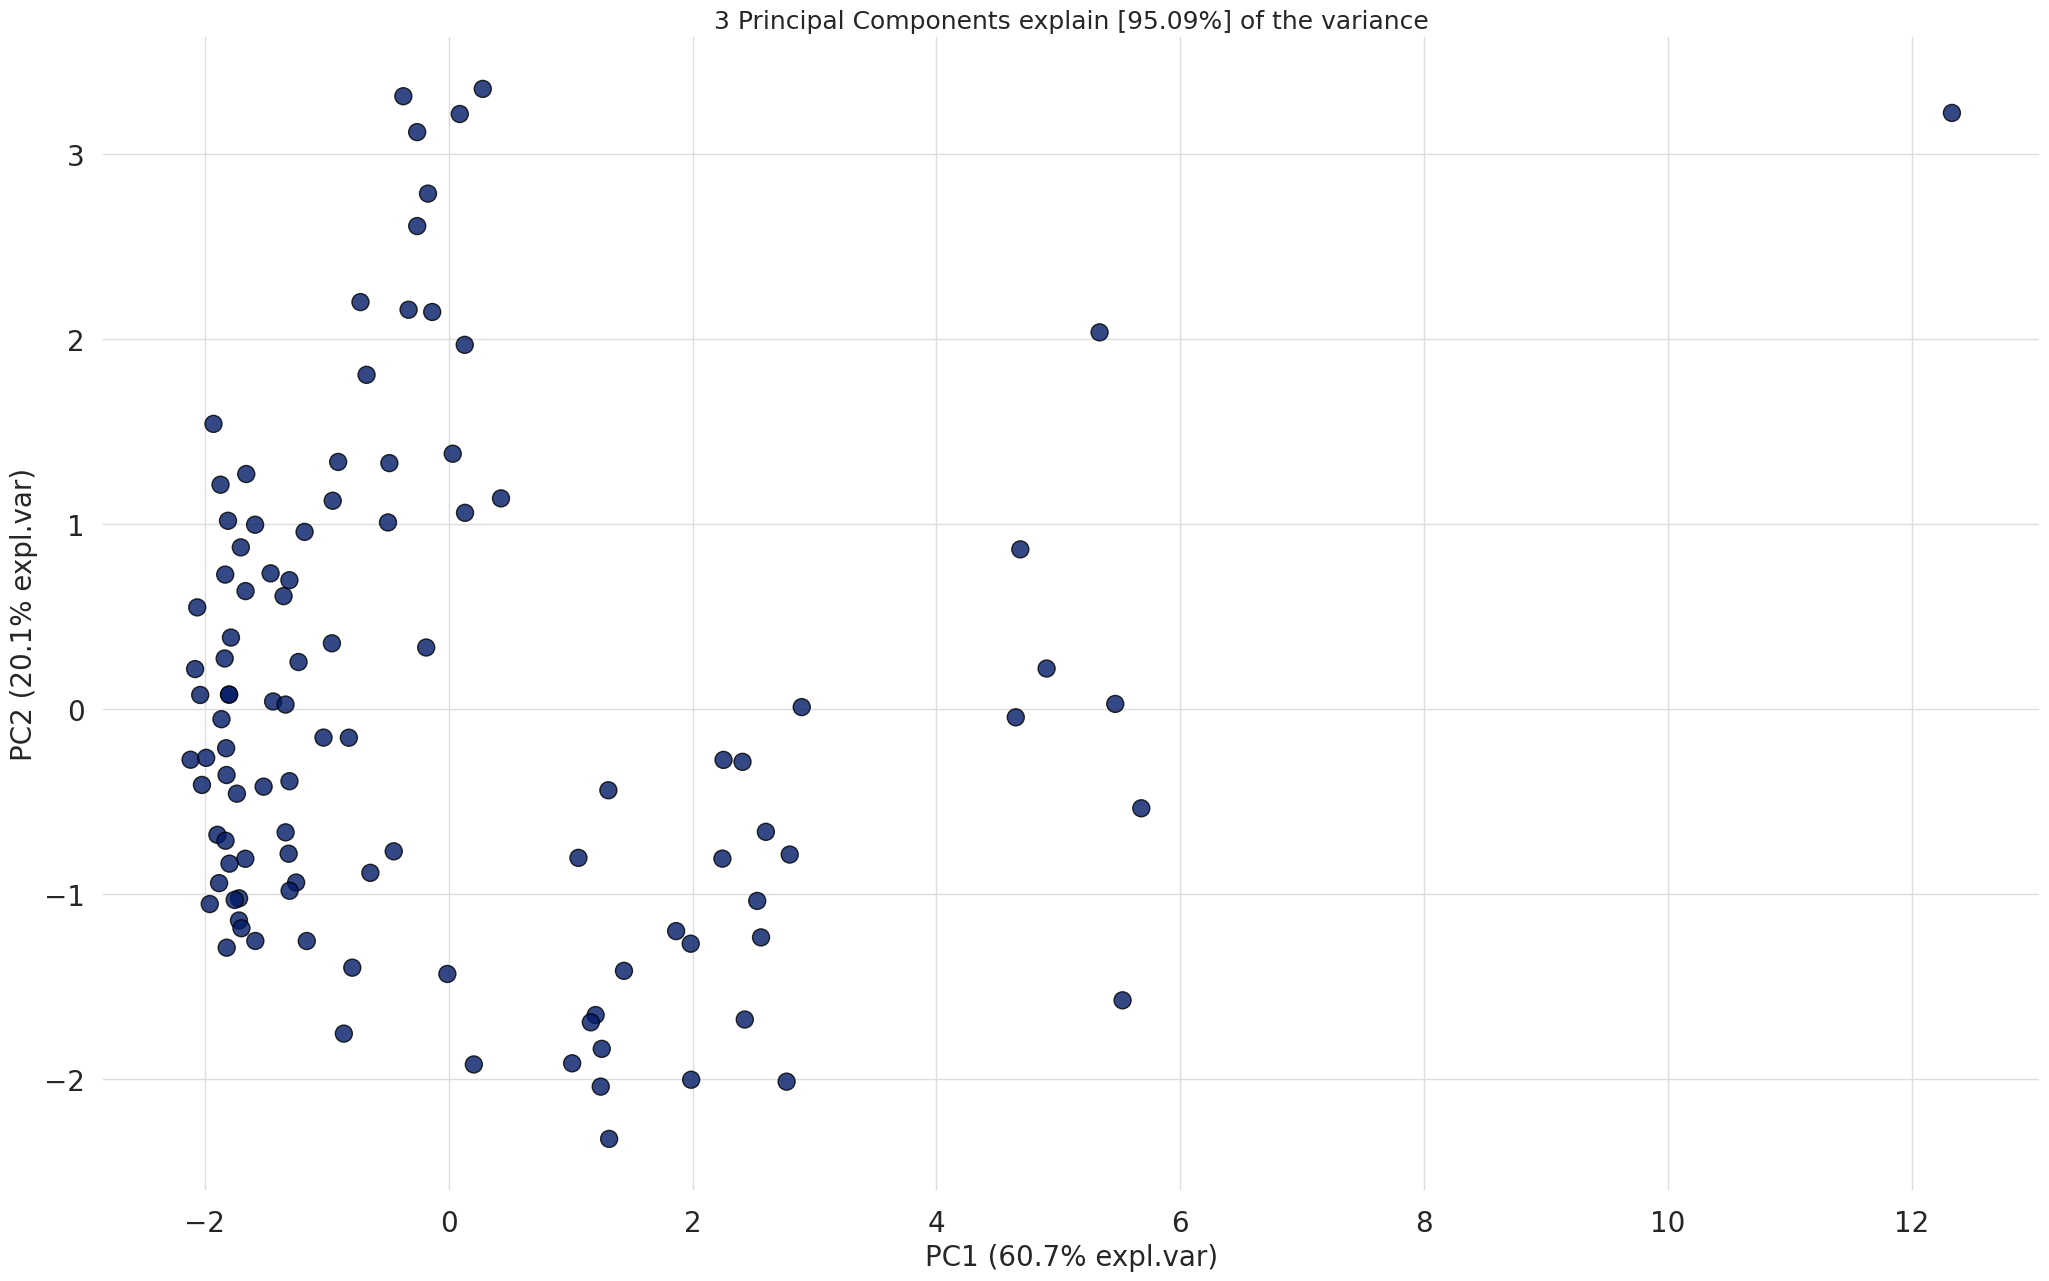

In [171]:
model.scatter(label=True, legend=False)

In [172]:
A = out['loadings'].T

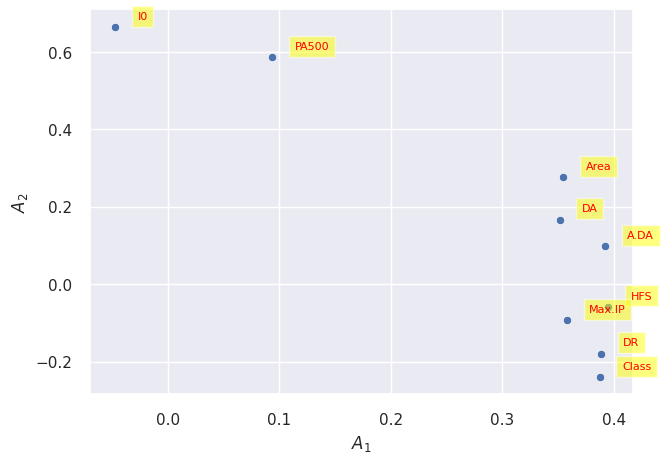

In [173]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=8),
          bbox=dict(facecolor='yellow',alpha=0.5))



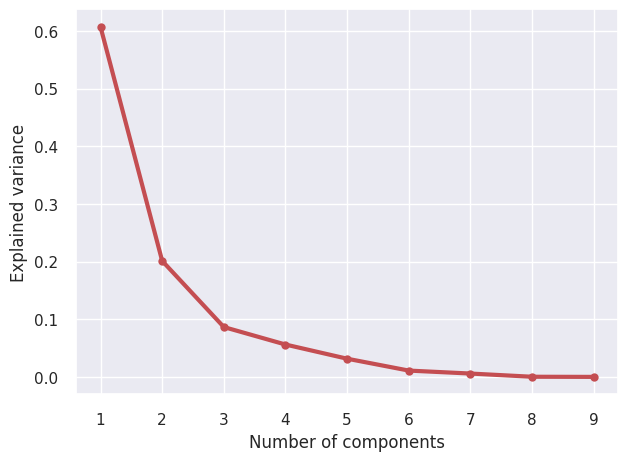

In [174]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

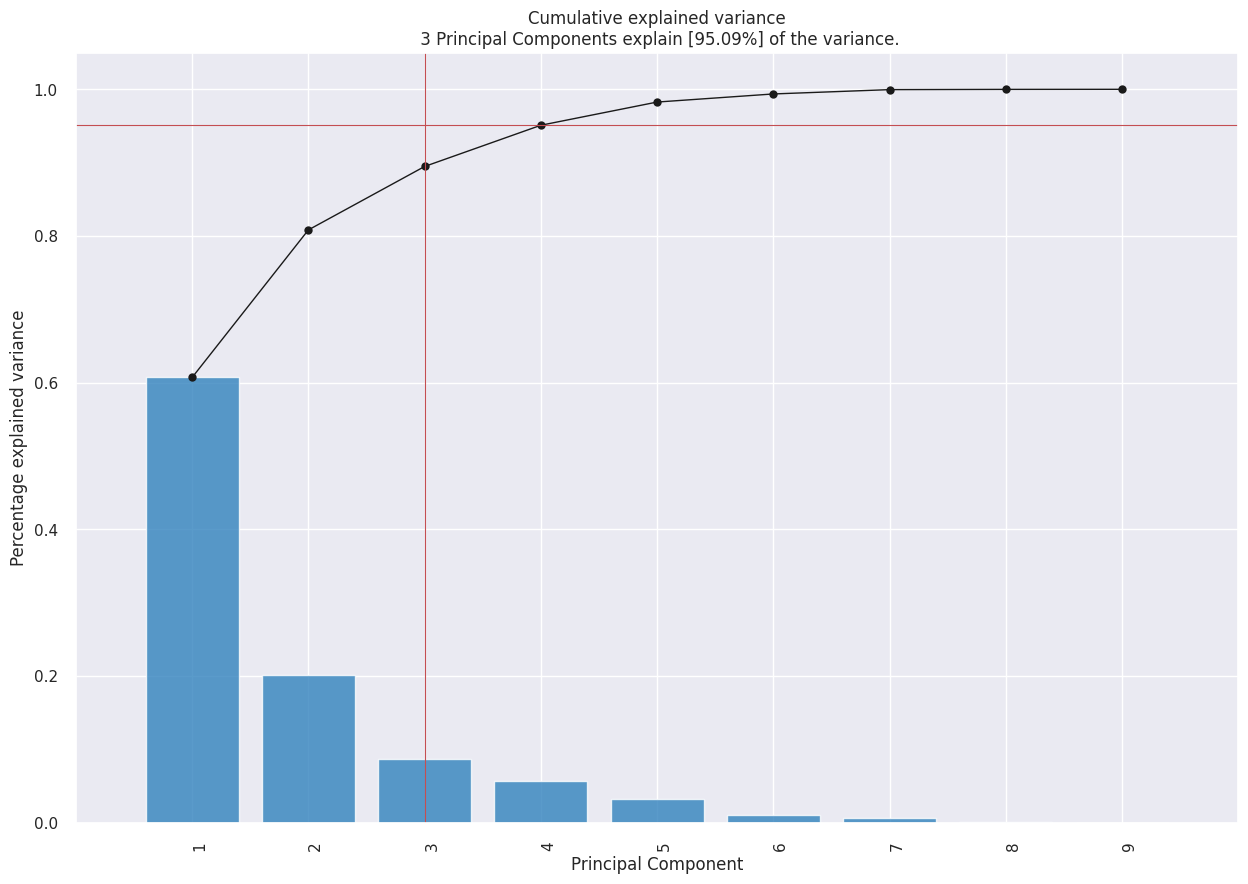

In [175]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [95.09%] of the variance'}, xlabel='PC1 (60.7% expl.var)', ylabel='PC2 (20.1% expl.var)'>)

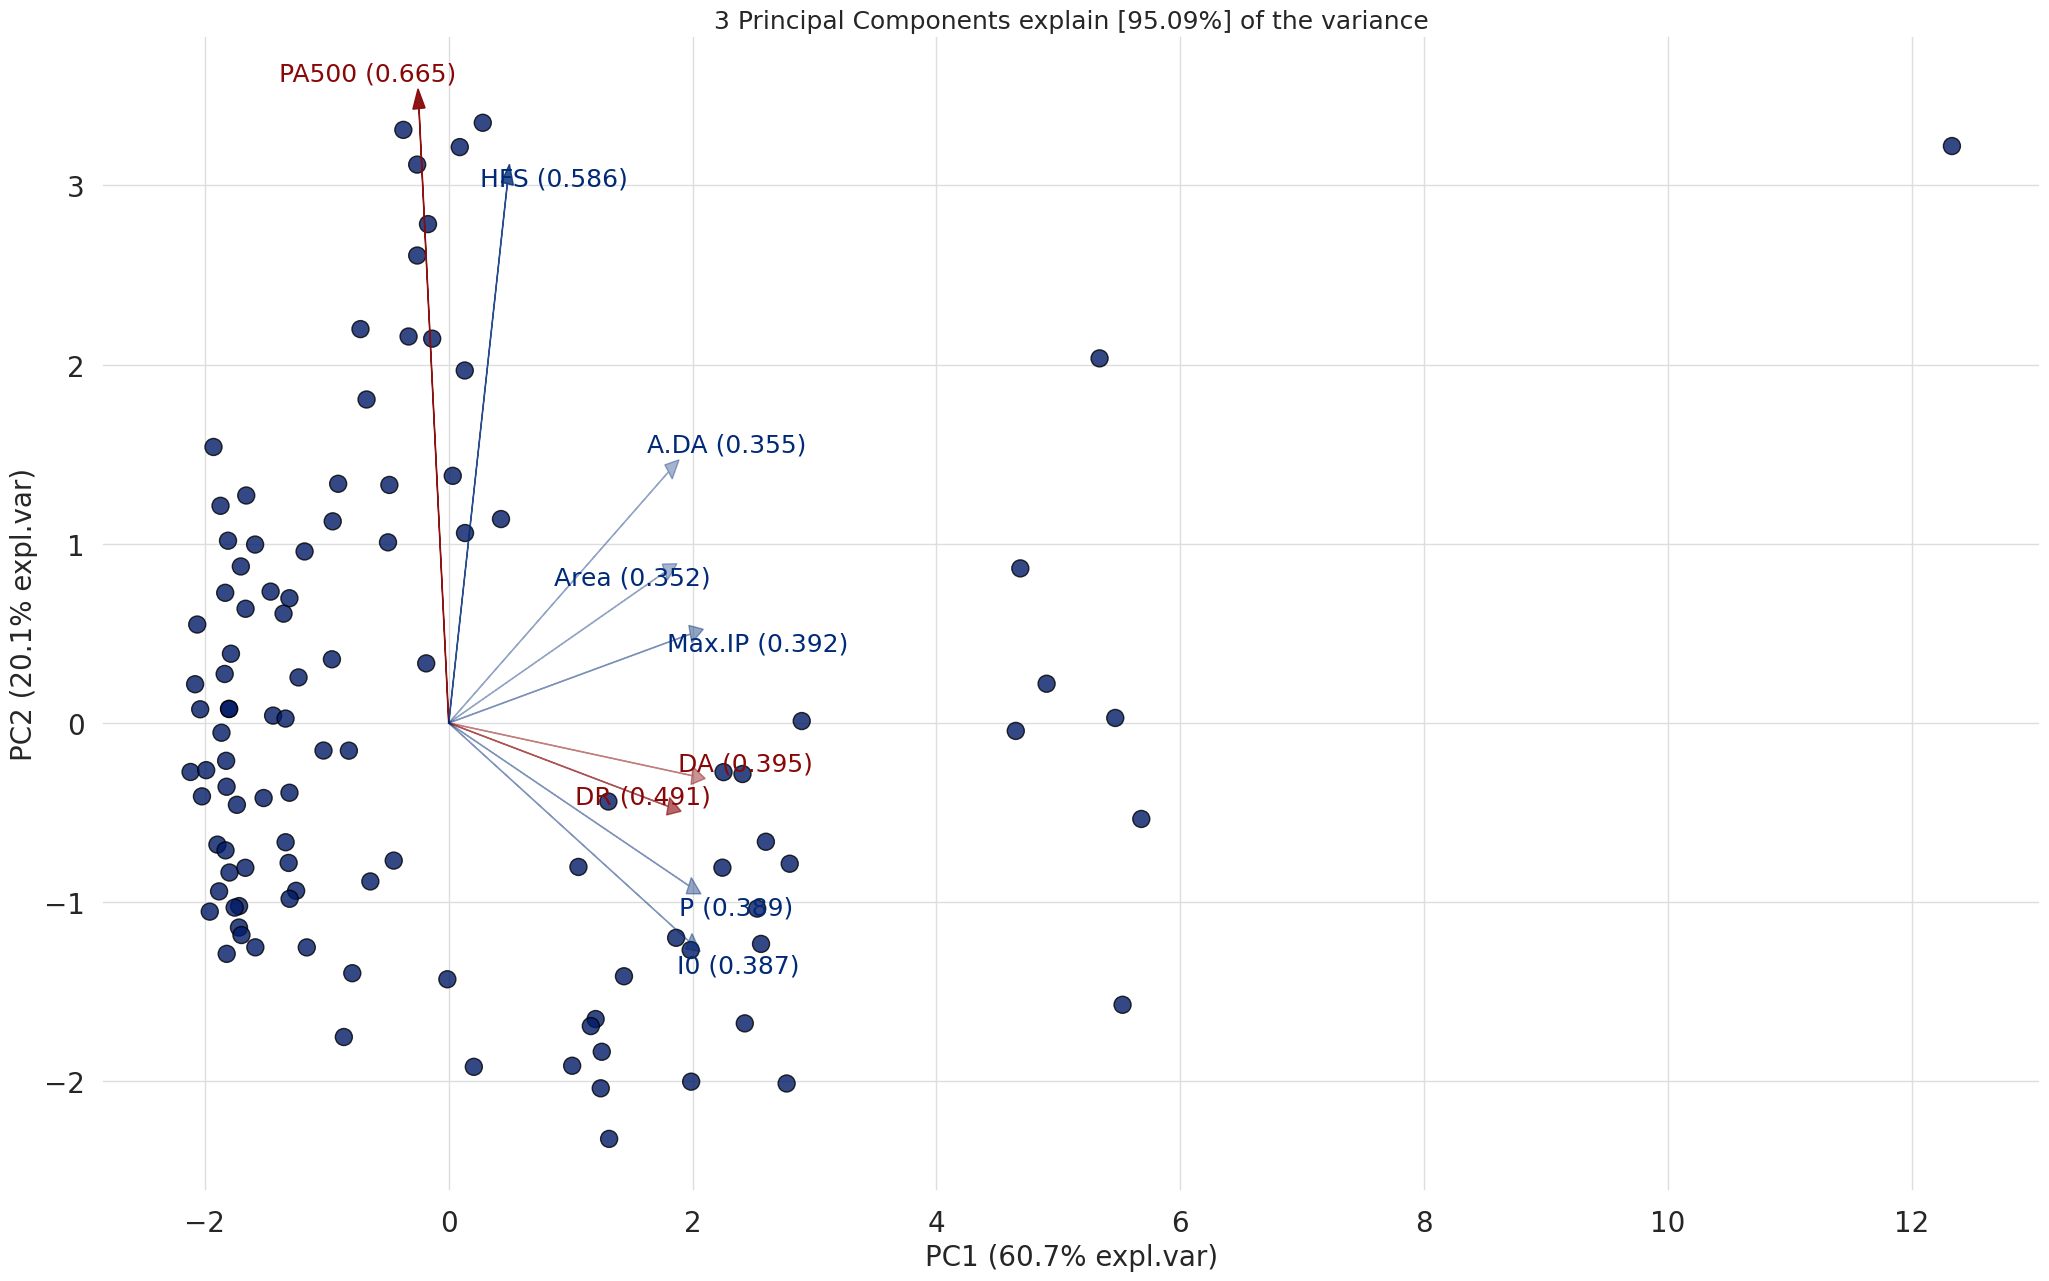

In [176]:
model.biplot(label=False, legend=False)

In [177]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (95, 10)
Unseen Data For Predictions: (11, 10)


In [178]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(95, 10)"
4,Transformed data shape,"(95, 10)"
5,Transformed train set shape,"(66, 10)"
6,Transformed test set shape,"(29, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [179]:
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7119,0.5448,0.7119,0.6472,0.6534,0.6473,0.6804,0.0970
dt,Decision Tree Classifier,0.7095,0.5050,0.7095,0.6353,0.6501,0.6476,0.6783,0.0940
lr,Logistic Regression,0.6952,0.0000,0.6952,0.6742,0.6548,0.6305,0.6646,1.9600
rf,Random Forest Classifier,0.6929,0.5645,0.6929,0.6302,0.6340,0.6241,0.6617,0.3340
lightgbm,Light Gradient Boosting Machine,0.6810,0.5519,0.6810,0.6187,0.6223,0.6062,0.6470,0.2340
gbc,Gradient Boosting Classifier,0.6667,0.0000,0.6667,0.6020,0.6058,0.5898,0.6242,0.9180
et,Extra Trees Classifier,0.6619,0.5621,0.6619,0.6063,0.6078,0.5873,0.6204,0.1480
lda,Linear Discriminant Analysis,0.6524,0.0000,0.6524,0.6282,0.6091,0.5791,0.6119,0.0260
nb,Naive Bayes,0.6167,0.5657,0.6167,0.5663,0.5663,0.5368,0.5729,0.0660
qda,Quadratic Discriminant Analysis,0.5714,0.0000,0.5714,0.4440,0.4724,0.4717,0.5214,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [180]:
xgboost= create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8524,0.7143,0.7143,0.6667,0.6585,0.6925
1,0.7143,0.8571,0.7143,0.6429,0.6667,0.6500,0.6669
2,0.7143,0.9524,0.7143,0.7143,0.6667,0.6585,0.6925
3,0.7143,0.8571,0.7143,0.5476,0.6095,0.6410,0.6779
4,0.5714,0.9286,0.5714,0.4286,0.4762,0.4750,0.5007
5,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.8333,0.0000,0.8333,0.7500,0.7778,0.7857,0.8154
7,0.8333,0.0000,0.8333,0.9167,0.8333,0.7931,0.8214
8,0.6667,0.0000,0.6667,0.6667,0.6667,0.5862,0.6071


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [181]:
xgboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [182]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8762,0.7143,0.7143,0.6667,0.6585,0.6925
1,0.7143,0.9048,0.7143,0.6429,0.6667,0.6500,0.6669
2,0.7143,0.9286,0.7143,0.7143,0.6667,0.6585,0.6925
3,0.8571,0.9048,0.8571,0.7857,0.8095,0.8250,0.8464
4,0.4286,0.9286,0.4286,0.3929,0.3429,0.3171,0.3884
5,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.8333,0.0000,0.8333,0.7500,0.7778,0.7857,0.8154
7,0.8333,0.0000,0.8333,0.9167,0.8333,0.7931,0.8214
8,0.6667,0.0000,0.6667,0.6667,0.6667,0.5714,0.5714


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [183]:
tuned_xgboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [184]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [185]:
dt= create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9167,0.8571,0.7857,0.8095,0.8250,0.8464
1,0.7143,0.8333,0.7143,0.6429,0.6667,0.6500,0.6669
2,0.7143,0.8333,0.7143,0.7143,0.6667,0.6585,0.6925
3,0.7143,0.8167,0.7143,0.5476,0.6095,0.6410,0.6779
4,0.5714,0.7500,0.5714,0.4286,0.4762,0.4750,0.5007
5,0.8571,0.9000,0.8571,0.7619,0.8000,0.8205,0.8433
6,0.6667,0.0000,0.6667,0.7500,0.6667,0.5862,0.6071
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.0000,0.5000,0.4167,0.4444,0.4194,0.4643


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [186]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [187]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8905,0.7143,0.7143,0.6667,0.6585,0.6925
1,0.7143,0.8333,0.7143,0.6429,0.6667,0.6500,0.6669
2,0.7143,0.9500,0.7143,0.7143,0.6667,0.6585,0.6925
3,0.7143,0.8905,0.7143,0.5476,0.6095,0.6410,0.6779
4,0.5714,0.9524,0.5714,0.4286,0.4762,0.4750,0.5007
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8333,0.0000,0.8333,0.7500,0.7778,0.7857,0.8154
7,0.6667,0.0000,0.6667,0.5556,0.5833,0.6000,0.6944
8,0.5000,0.0000,0.5000,0.4167,0.4444,0.4375,0.5189


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [188]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [189]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [190]:
lr= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.7143,0.6667,0.6585,0.6925
1,0.7143,0.0000,0.7143,0.7143,0.6667,0.6585,0.6925
2,0.8571,0.0000,0.8571,0.7857,0.8095,0.8250,0.8464
3,0.4286,0.0000,0.4286,0.4762,0.4048,0.3171,0.3426
4,0.7143,0.0000,0.7143,0.5714,0.6190,0.6500,0.6852
5,0.8571,0.0000,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.8333,0.0000,0.8333,0.9167,0.8333,0.7931,0.8214
7,0.8333,0.0000,0.8333,0.7222,0.7667,0.7778,0.8101
8,0.3333,0.0000,0.3333,0.5000,0.3889,0.2000,0.2143


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [191]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.7143,0.6667,0.6585,0.6925
1,0.7143,0.0000,0.7143,0.7143,0.6667,0.6585,0.6925
2,0.8571,0.0000,0.8571,0.7857,0.8095,0.8250,0.8464
3,0.5714,0.0000,0.5714,0.5000,0.5238,0.4750,0.4873
4,0.7143,0.0000,0.7143,0.5714,0.6190,0.6500,0.6852
5,0.8571,0.0000,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.8333,0.0000,0.8333,0.9167,0.8333,0.7931,0.8214
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.3333,0.0000,0.3333,0.3333,0.3333,0.1429,0.1482


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [193]:
tuned_lr

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [195]:
clf_pca = setup(data=df, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(106, 10)"
4,Transformed data shape,"(106, 4)"
5,Transformed train set shape,"(74, 4)"
6,Transformed test set shape,"(32, 4)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [196]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6357,0.9136,0.6357,0.6086,0.5955,0.5624,0.5825,0.1490
et,Extra Trees Classifier,0.6250,0.9371,0.6250,0.5768,0.5741,0.5455,0.5706,0.1740
rf,Random Forest Classifier,0.6143,0.9171,0.6143,0.5393,0.5490,0.5379,0.5656,0.1920
knn,K Neighbors Classifier,0.6018,0.8783,0.6018,0.5537,0.5538,0.5218,0.5450,0.0530
gbc,Gradient Boosting Classifier,0.5946,0.0000,0.5946,0.5342,0.5349,0.5120,0.5408,0.7170
nb,Naive Bayes,0.5804,0.9047,0.5804,0.5646,0.5460,0.4924,0.5140,0.0390
lr,Logistic Regression,0.5786,0.0000,0.5786,0.5527,0.5461,0.4892,0.5154,0.0430
qda,Quadratic Discriminant Analysis,0.5571,0.0000,0.5571,0.4920,0.4996,0.4638,0.4906,0.0370
lightgbm,Light Gradient Boosting Machine,0.5554,0.8982,0.5554,0.4746,0.4896,0.4669,0.4949,0.1120
lda,Linear Discriminant Analysis,0.5500,0.0000,0.5500,0.5083,0.5076,0.4546,0.4819,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [197]:
best_model_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [198]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9821,0.8750,0.7917,0.8250,0.8431,0.8607
1,0.6250,0.8601,0.6250,0.5417,0.5625,0.5556,0.6005
2,0.2500,0.7351,0.2500,0.3125,0.2500,0.1111,0.1201
3,0.6250,0.9435,0.6250,0.6250,0.6250,0.5385,0.5385
4,0.7143,0.9524,0.7143,0.5714,0.6190,0.6500,0.6852
5,0.4286,0.9000,0.4286,0.2619,0.3095,0.3333,0.3796
6,0.5714,0.7714,0.5714,0.5476,0.5000,0.4878,0.5423
7,0.4286,0.8000,0.4286,0.5000,0.4286,0.3171,0.3334
8,0.5714,0.9524,0.5714,0.4048,0.4667,0.4615,0.4881


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [199]:
tuned_best_model_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [200]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [201]:
xgboost_pca = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.5000,0.9464,0.5000,0.5000,0.4583,0.4182,0.4511
2,0.2500,0.7917,0.2500,0.1875,0.2083,0.1111,0.1177
3,0.7500,0.9405,0.7500,0.8750,0.7500,0.7037,0.7308
4,0.7143,0.9524,0.7143,0.5714,0.6190,0.6500,0.6852
5,0.8571,0.9524,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.4286,0.8952,0.4286,0.4048,0.3571,0.3171,0.3525
7,0.4286,0.7762,0.4286,0.5000,0.4286,0.3171,0.3334
8,0.4286,0.8810,0.4286,0.2619,0.3238,0.2821,0.3075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [202]:
tuned_xgboost_pca = tune_model(xgboost_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9821,0.8750,0.7917,0.8250,0.8431,0.8607
1,0.6250,0.8601,0.6250,0.5417,0.5625,0.5556,0.6005
2,0.2500,0.7351,0.2500,0.3125,0.2500,0.1111,0.1201
3,0.6250,0.9435,0.6250,0.6250,0.6250,0.5385,0.5385
4,0.7143,0.9524,0.7143,0.5714,0.6190,0.6500,0.6852
5,0.4286,0.9000,0.4286,0.2619,0.3095,0.3333,0.3796
6,0.5714,0.7714,0.5714,0.5476,0.5000,0.4878,0.5423
7,0.4286,0.8000,0.4286,0.5000,0.4286,0.3171,0.3334
8,0.5714,0.9524,0.5714,0.4048,0.4667,0.4615,0.4881


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


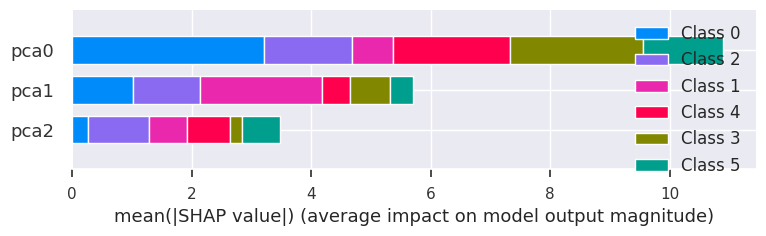

In [203]:
interpret_model(tuned_xgboost_pca, plot='summary')

In [209]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.9464,0.6250,0.6042,0.5625,0.5472,0.5929
1,0.5000,0.8839,0.5000,0.4167,0.4500,0.3846,0.4003
2,0.2500,0.9226,0.2500,0.1250,0.1667,0.1111,0.1201
3,0.8750,0.9613,0.8750,0.8125,0.8333,0.8462,0.8629
4,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.7143,0.9762,0.7143,0.7619,0.6905,0.6585,0.7115
6,0.5714,0.8833,0.5714,0.5000,0.4762,0.4878,0.5270
7,0.5714,0.8929,0.5714,0.7143,0.6190,0.4878,0.5000
8,0.4286,0.9286,0.4286,0.2619,0.3238,0.2821,0.2983


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [210]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8750,0.7500,0.7292,0.7000,0.6923,0.7206
1,0.5000,0.8423,0.5000,0.5625,0.5000,0.4074,0.4231
2,0.2500,0.9464,0.2500,0.1042,0.1458,0.1273,0.1431
3,0.6250,0.9196,0.6250,0.4167,0.4917,0.5472,0.5929
4,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.8571,0.8952,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.2857,0.8286,0.2857,0.2143,0.2381,0.1250,0.1282
7,0.4286,0.9048,0.4286,0.5714,0.4762,0.3171,0.3334
8,0.8571,0.9762,0.8571,0.7619,0.8000,0.8205,0.8433


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [211]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [212]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.9464,0.6250,0.6042,0.5625,0.5472,0.5929
1,0.5000,0.8839,0.5000,0.4167,0.4500,0.3846,0.4003
2,0.2500,0.9226,0.2500,0.1250,0.1667,0.1111,0.1201
3,0.8750,0.9613,0.8750,0.8125,0.8333,0.8462,0.8629
4,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.7143,0.9762,0.7143,0.7619,0.6905,0.6585,0.7115
6,0.5714,0.8833,0.5714,0.5000,0.4762,0.4878,0.5270
7,0.5714,0.8929,0.5714,0.7143,0.6190,0.4878,0.5000
8,0.4286,0.9286,0.4286,0.2619,0.3238,0.2821,0.2983


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [214]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8750,0.7500,0.7292,0.7000,0.6923,0.7206
1,0.5000,0.8423,0.5000,0.5625,0.5000,0.4074,0.4231
2,0.2500,0.9464,0.2500,0.1042,0.1458,0.1273,0.1431
3,0.6250,0.9196,0.6250,0.4167,0.4917,0.5472,0.5929
4,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.8571,0.8952,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.2857,0.8286,0.2857,0.2143,0.2381,0.1250,0.1282
7,0.4286,0.9048,0.4286,0.5714,0.4762,0.3171,0.3334
8,0.8571,0.9762,0.8571,0.7619,0.8000,0.8205,0.8433


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


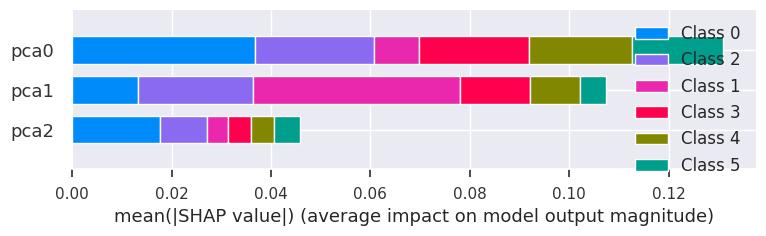

In [215]:
interpret_model(tuned_et_pca, plot='summary')

In [216]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.9464,0.6250,0.6042,0.5625,0.5472,0.5929
1,0.3750,0.8214,0.3750,0.2500,0.2917,0.2593,0.2802
2,0.2500,0.8542,0.2500,0.1042,0.1458,0.1273,0.1431
3,0.7500,0.9583,0.7500,0.6250,0.6667,0.7037,0.7452
4,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.4286,0.8238,0.4286,0.4048,0.3571,0.3171,0.3525
7,0.5714,0.8619,0.5714,0.7143,0.6190,0.4878,0.5000
8,0.5714,0.9524,0.5714,0.3333,0.4190,0.4615,0.5031


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [217]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9464,0.7500,0.7292,0.7000,0.6923,0.7206
1,0.5000,0.8631,0.5000,0.5417,0.4792,0.4182,0.4604
2,0.2500,0.8512,0.2500,0.1042,0.1458,0.1273,0.1431
3,0.7500,0.9613,0.7500,0.8125,0.7500,0.6981,0.7115
4,0.7143,0.9286,0.7143,0.5714,0.6190,0.6500,0.6852
5,0.7143,0.9238,0.7143,0.7857,0.7143,0.6585,0.6750
6,0.4286,0.8524,0.4286,0.4048,0.3571,0.3171,0.3525
7,0.5714,0.8524,0.5714,0.6429,0.5714,0.4878,0.5000
8,0.7143,0.9286,0.7143,0.5476,0.6095,0.6410,0.6779


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [218]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

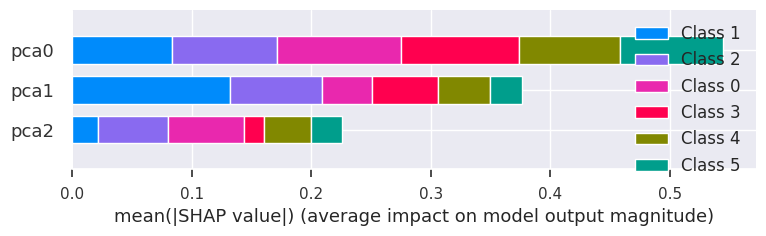

In [219]:
interpret_model(tuned_rf_pca, plot='summary')